In [31]:
### THIS IS JUST FOR A MORE PRACTICAL AND FANCY NOTEBOOK
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 99%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
##################################################

import sys 

# Install all dependencies
#!{sys.executable} -m pip install numpy scipy matplotlib pyvis 

# Change path as the folder adress you have put the library in 
path = "/Users/zhu/Desktop/GEJP/GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm

### DESCRIPTION : 
This is a small modificaiton of Goodwin. Assume that labour productivity (parameter a in our basic model) is not exoge- nous but depends upon the growth rate of investment (in R & D). This leads to adding the following equation:
              $$\frac{\dot{a}}{a} = \alpha + \beta g$$


**TYPICAL BEHAVIOR** : Locally Unstable, the good equilibrium is an unstable focuse


#### Author: Weiye Zhu


In [32]:
# ######################## PRELIMINARY ELEMENTS #########################
import numpy as np 
from pygemmes._models import Funcs, importmodel,mergemodel


In [33]:
# ######################## LOGICS #######################################
_LOGICS,_PRESETS0= importmodel('Goodwin')

In [34]:

_GE_LOGICS = {
    'differential': {
        # Endogenous Labor Productivity
        'a': {
            'func': lambda a, alpha, beta, g: a*(alpha + beta * g),
            'com': 'Labor Productivity depends on investment', },

    }
}

In [35]:
_LOGICS = mergemodel(_LOGICS, _GE_LOGICS, verb=True) 

In [36]:
# # ####################### PRESETS #######################################
# plotdict= {
#             'timetrace': [{}],
#             'nyaxis': [{'x': 'time',
#                         'y': [['employment', 'omega'],
#                               ['kappa', 'pi'],
#                               ],
#                         'idx':0,
#                         'title':'',
#                         'lw':2},
#                        {'x': 'time',
#                         'y': [['K', 'Y', 'I', 'Pi'],
#                               ['inflation', 'g'],
#                               ],
#                         'idx':0,
#                         'log':[False,False],
#                         'title':'',
#                         'lw':1}],
#             'phasespace': [{'x': 'employment',
#                             'y': 'omega',
#                             'color': 'd',
#                             'idx': 0}],
#             'byunits': [{'title': '',
#                          'lw': 2,       # optional
#                          'idx': 0,      # optional
#                          },  # optional
#                         ],
#         }

In [37]:
_PRESETS = {
    'default': {
        'fields': {
            'dt': 0.011,
            'a': 1.01,
            'N': 1.01,
            'K': 2.91,
            'D': 0.01,
            'w': .5*1.19,
            'alpha': 0.021,
            'n': 0.0251,
            'nu': 31,
            'delta': .0051,
            'phinull': 0.11,
        },
        'com': (
            'This is a run that should give simple '
            'convergent oscillations'),
        'plots': {
            'timetrace': [{}],
            'nyaxis': [{'x': 'time',
                        'y': [['lambda', 'omega'],
                              ['K'],
                              ],
                        'idx':0,
                        'title':'',
                        'lw':1}],
            'phasespace': [{'x': 'lambda',
                            'y': 'omega',
                            'color': 'time',
                            'idx': 0}],
            '3D': [{'x': 'lambda',
                    'y': 'omega',
                    'z': 'time',
                    'cinf': 'pi',
                    'cmap': 'jet',
                    'index': 0,
                    'title': ''}],
            'byunits': [],
        },
    },
    'many-orbits': {
        'fields': {
            'dt': 0.01,
            'a': 1,
            'N': 1,
            'K': 2.9,
            'D': 0,
            'w': [.5, .5*1.2, .5*1.3, .5*1.5, .5*1.7],
            'alpha': 0.02,
            'n': 0.025,
            'nu': 3,
            'delta': .005,
            'phinull': 0.1,
        },
        'com': (
            'Shows many trajectories'),
        'plots': {
            'timetrace': [{'keys': ['lambda', 'omega']}],
            'nyaxis': [],
            'phasespace': [{'x': 'lambda',
                           'y': 'omega',
                            'idx': 0}],
            '3D': [],
            'byunits': [],
        },
    },
}

In [38]:
pgm.get_available_models('Goodwin_Endo',details=True)



##################################
########## Goodwin_Endo ##########

DESCRIPTION :

    This is a small modificaiton of Goodwin. Assume that labour productivity (parameter a in our basic model) is not exogenous 
    but depends upon the growth rate of investment (in R & D). This leads to adding the following equation:
    dot(a) / a = alpha + beta * g



TYPICAL BEHAVIOR: Locally Unstable, the good equilibrium is an unstable focuse


@author: Weiye Zhu


####Variables ####:
#differential variables (4):
	-  a :         Productivity
	-  N :         Population of people able to work
	-  K :         Capital
	-  w :         Wage value
# State Variables (14):
	-  Y :         GDP in output quantity
	-  L :         Workers
	-  phillips :  Wage inflation rate
	-  I :         Investment in money
	-  Ir :        Number of real unit from investment
	-  C :         
	-  W :         
	-  pi :        relative profit
	-  employment :employment rate
	-  omega :     wage share
	-  GDP :       GDP in

In [39]:
hub = pgm.Hub('Goodwin_Endo')

The following fields are defined in the model but not it the library :
	- statevar: ['C', 'W']
The following fields are identified as parameters :
	- independant : ['alpha', 'beta', 'n', 'delta', 'nu', 'p', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['C', 'W', 'pi', 'omega', 'c']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'phillips', 'I', 'Ir', 'pi', 'g']
	- differential: ['a', 'N', 'K', 'w', 'time']


In [40]:
hub.get_summary()

############################################################
####################      SUMMARY       ####################
############################################################
Model       : Goodwin_Endo

DESCRIPTION :

    This is a small modificaiton of Goodwin. Assume that labour productivity (parameter a in our basic model) is not exogenous 
    but depends upon the growth rate of investment (in R & D). This leads to adding the following equation:
    dot(a) / a = alpha + beta * g



TYPICAL BEHAVIOR: Locally Unstable, the good equilibrium is an unstable focuse


@author: Weiye Zhu

File        : /Users/zhu/Desktop/GEJP/GEMMES/models/Extended/_model_Goodwin_Endo.py
####################       Fields       ####################
statevar        014 ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'phillips', 'I', 'Ir', 'pi', 'g']
differential    005 ['a', 'N', 'K', 'w', 'time']
parameters      015 ['alpha', 'beta', 'n', 'delta', 'nu', 'p', 'phinull', 'phi0', 'phi1']


In [41]:
hub.get_equations_description()

############# DIFFERENTIAL EQUATIONS ###########
###  a  ###########
Units        : Units.Humans^{-1}.y^{-1}
Equation     : da/dt= a*(alpha + beta * g),
definition   : Productivity
units        : Units.Humans^{-1}.y^{-1}
Comment      : Labor Productivity depends on investment
Dependencies :
     a         Units.Humans^{-1}.y^{-1}  Productivity
     alpha     y^{-1}    Rate of productivity increase
     beta                Endogenous technical progress from growth
     g         y^{-1}    Relative growth of GDP
 
###  N  ###########
Units        : Humans
Equation     : dN/dt= N * n,
definition   : Population of people able to work
units        : Humans
Comment      : ODE exogenous exponential
Dependencies :
     N         Humans    Population of people able to work
     n         y^{-1}    Rate of population growth
 
###  K  ###########
Units        : Units
Equation     : dK/dt= Ir - K * delta,
definition   : Capital
units        : Units
Comment      : Capital evolution from investment 

In [42]:
hub.run()

time step 7459 / 10000
time step 10000 / 10000


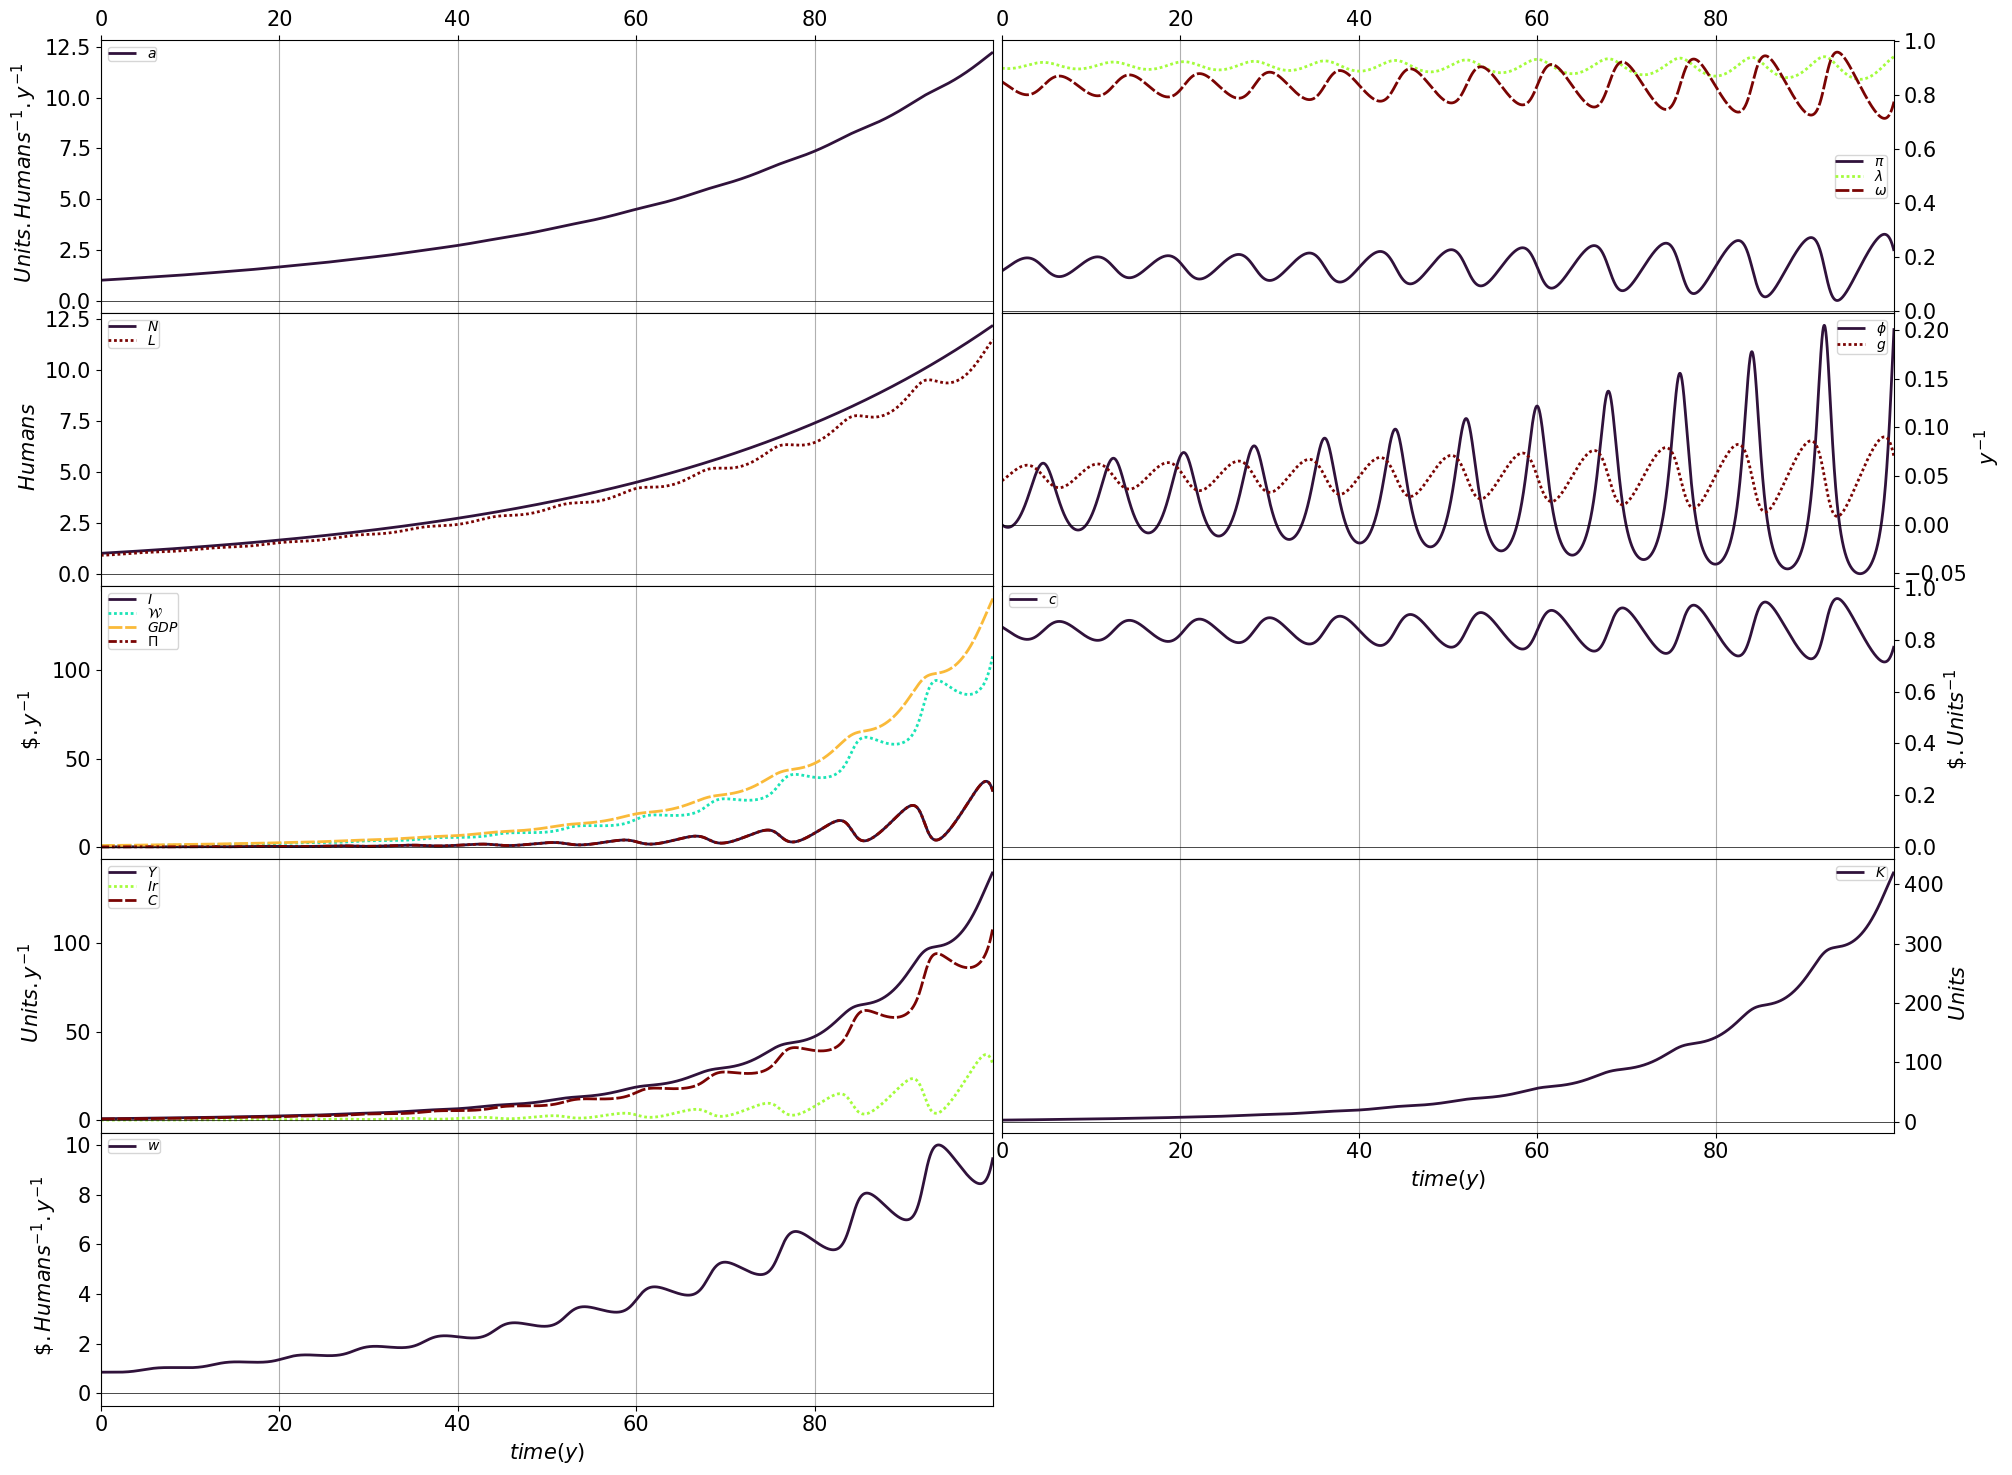

In [43]:
hub.plot()

[0.   0.05 0.1 ]



### Identified keys to be changed ###
   Dimensions : ['nx']
   Fields : ['alpha']
   Ignored :[]
time step 7493 / 10000
time step 10000 / 10000
the system is calculating statsensitivity...
done


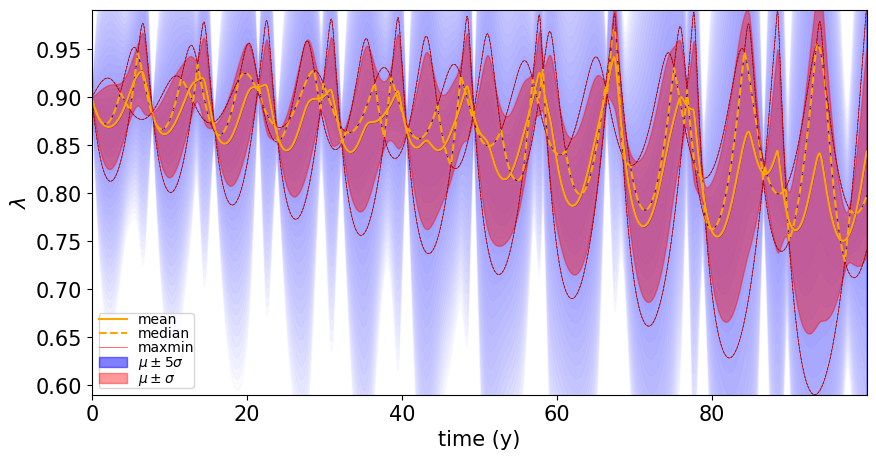

In [44]:
import numpy as np
print(np.linspace(0,0.1,3))
hub=pgm.Hub('Goodwin_Endo',verb=False)
hub.set_dparam(**{
    'nx':3,
    'alpha':np.linspace(0,0.1,3),})
hub.run()
pgm.plots.Var(hub,'employment',mode='sensitivity')

The following fields are defined in the model but not it the library :
	- statevar: ['C', 'W']
The following fields are identified as parameters :
	- independant : ['alpha', 'beta', 'n', 'delta', 'nu', 'p', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['C', 'W', 'pi', 'omega', 'c']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'phillips', 'I', 'Ir', 'pi', 'g']
	- differential: ['a', 'N', 'K', 'w', 'time']

### Identified keys to be changed ###
   Dimensions : ['dt']
   Fields : []
   Ignored :[]
time step 1000 / 1000


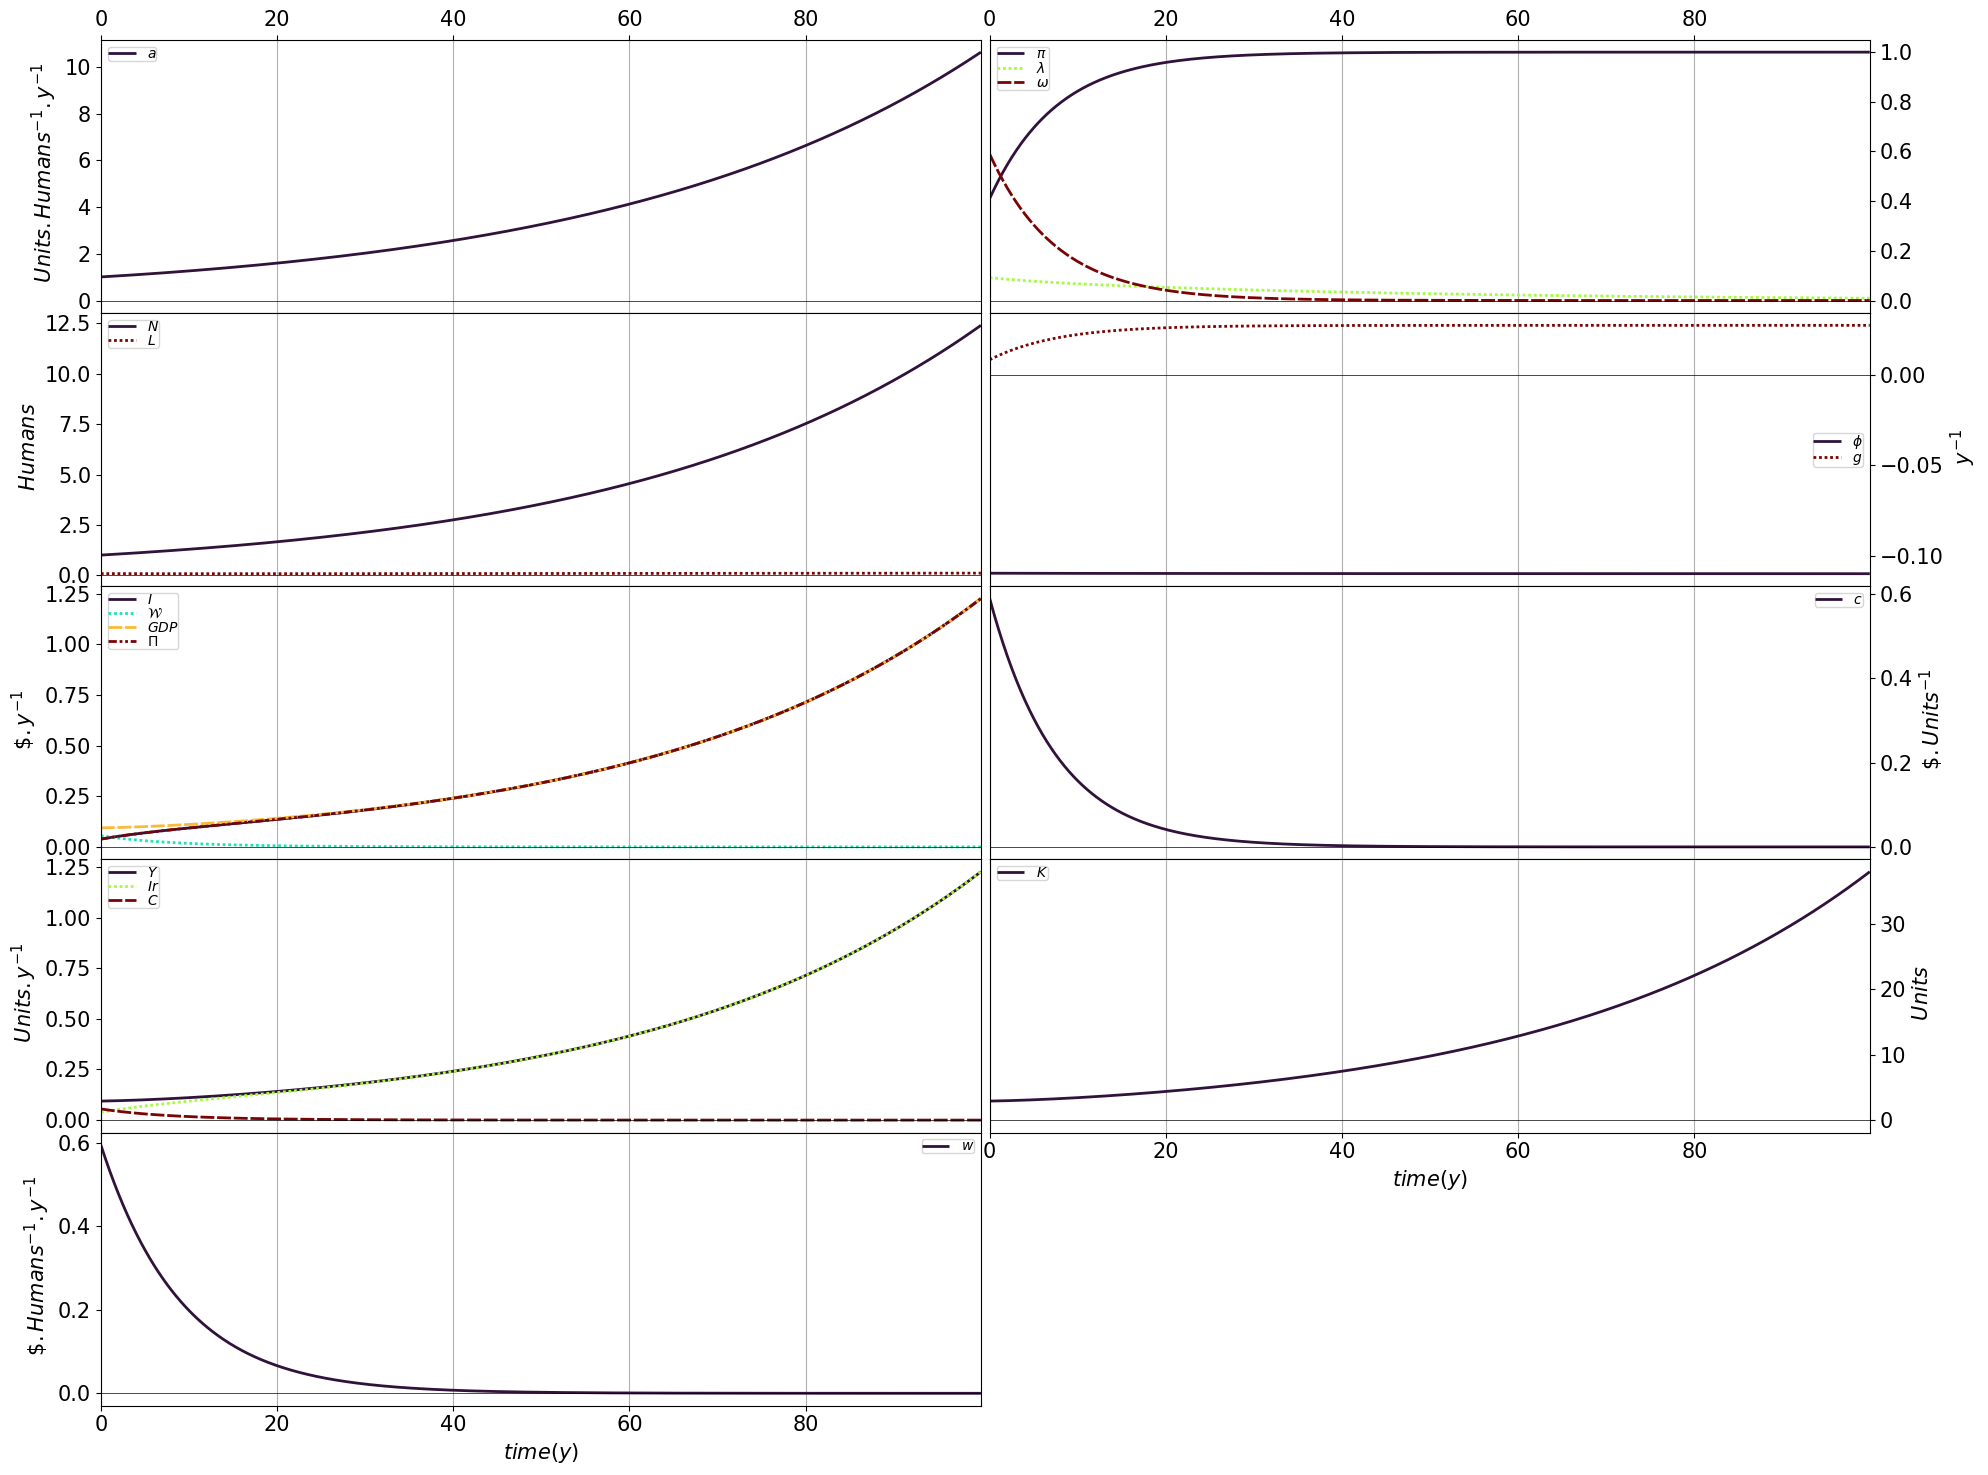

In [45]:
hub=pgm.Hub('Goodwin_Endo',preset='default')
hub.set_dparam('dt',0.1)
hub.run()
hub.plot()

The following fields are defined in the model but not it the library :
	- statevar: ['C', 'W']
The following fields are identified as parameters :
	- independant : ['alpha', 'beta', 'n', 'delta', 'nu', 'p', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['C', 'W', 'pi', 'omega', 'c']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'phillips', 'I', 'Ir', 'pi', 'g']
	- differential: ['a', 'N', 'K', 'w', 'time']
time step 7051 / 9090
time step 9090 / 9090
WARNING, PLOT `plot_timetraces` DEPRECIATED. SKIPPED FOR MATPLOTLIB ISSUES


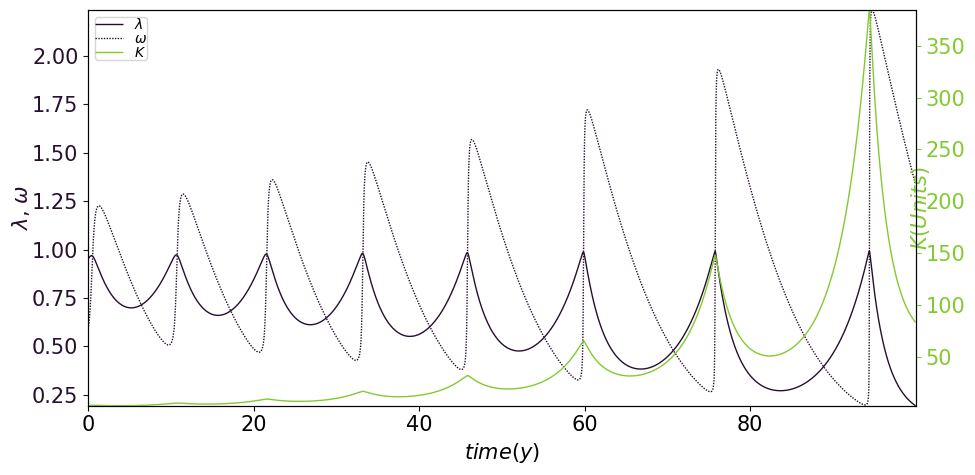

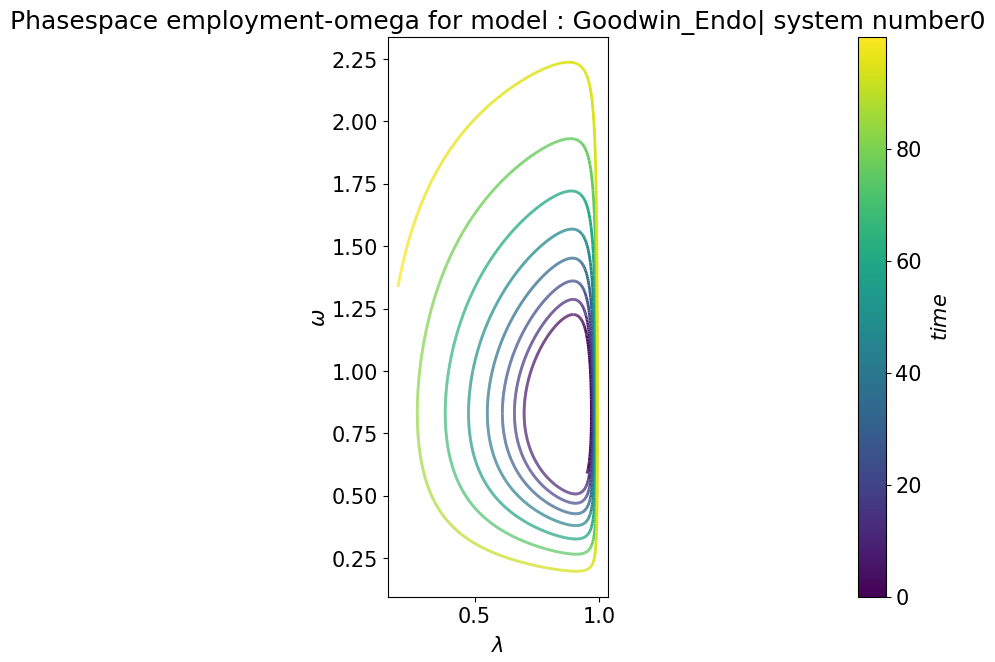

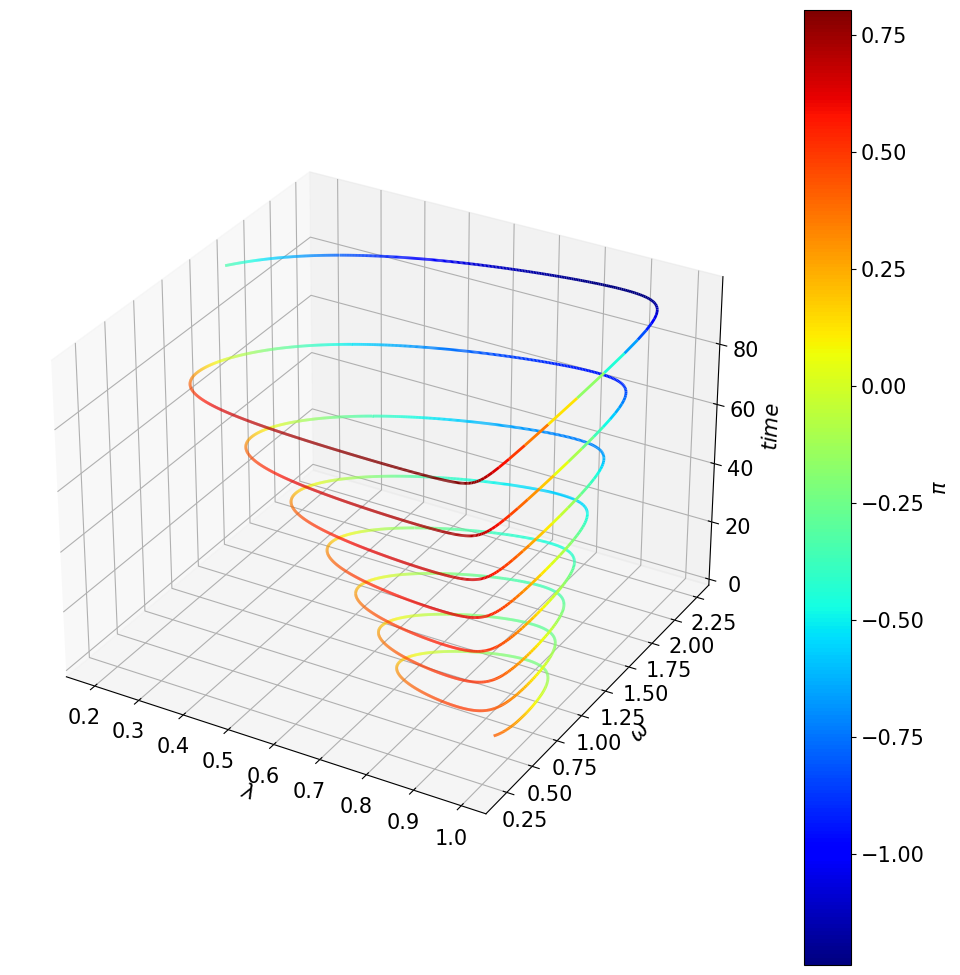

In [50]:
hub=pgm.Hub('Goodwin_Endo',preset='default')
hub.run()
hub.plot_preset()

In [49]:
hub.get_summary()

############################################################
####################      SUMMARY       ####################
############################################################
Model       : Goodwin_Endo

DESCRIPTION :

    This is a small modificaiton of Goodwin. Assume that labour productivity (parameter a in our basic model) is not exogenous 
    but depends upon the growth rate of investment (in R & D). This leads to adding the following equation:
    dot(a) / a = alpha + beta * g



TYPICAL BEHAVIOR: Locally Unstable, the good equilibrium is an unstable focuse


@author: Weiye Zhu

File        : /Users/zhu/Desktop/GEJP/GEMMES/models/Extended/_model_Goodwin_Endo.py
####################       Fields       ####################
statevar        014 ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'phillips', 'I', 'Ir', 'pi', 'g']
differential    005 ['a', 'N', 'K', 'w', 'time']
parameters      015 ['alpha', 'beta', 'n', 'delta', 'nu', 'p', 'phinull', 'phi0', 'phi1']
